Parameter - Drug Concentration Fitting

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [62]:
data = pd.read_excel('D:/CQB/会议/2024UQ-Bio/Assignments/UQbio2024_Team3/fig/para_drug.xlsx')
def hill_p(x, a, n, K, b):
    return a * x**n / (K**n + x**n) + b

def hill_n(x, a, n, K, b):
    return a * K**n / (K**n + x**n) + b

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_25904\3407379727.py:3: RuntimeWarning: invalid value encountered in scalar power
  return a * x**n / (K**n + x**n) + b


a=-0.121, n=2.363, K=299.132, b=0.120
a=-0.016, n=3.085, K=480.176, b=0.016
a=-0.968, n=3.112, K=685.525, b=0.969
a=1.208, n=1.781, K=5338.262, b=0.008
a=0.306, n=2.061, K=2031.863, b=0.009


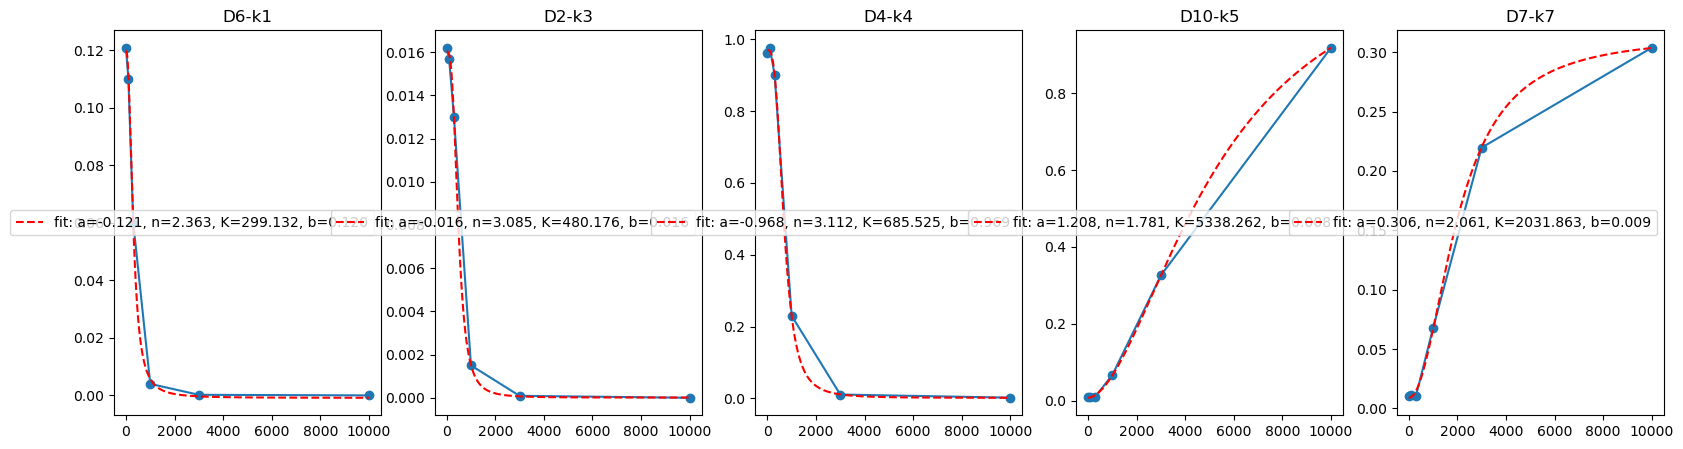

In [63]:
initial_params = [0.5, 2, 2000, 0.1]

fig, ax = plt.subplots(1,5,figsize=(20,5))
for i in range(5):
    ax[i].plot(data.iloc[:,0], data.iloc[:,i+1],'o-')
    ax[i].set_title(data.columns[i+1])
    params, params_covariance = curve_fit(hill_p, data.iloc[:,0], data.iloc[:,i+1], p0=initial_params)
    ax[i].plot(np.linspace(0,10000,2001), hill_p(np.linspace(0,10000,2001), *params), 'r--', label='fit: a=%5.3f, n=%5.3f, K=%5.3f, b=%5.3f' % tuple(params))
    ax[i].legend()
    print('a=%5.3f, n=%5.3f, K=%5.3f, b=%5.3f' % tuple(params))

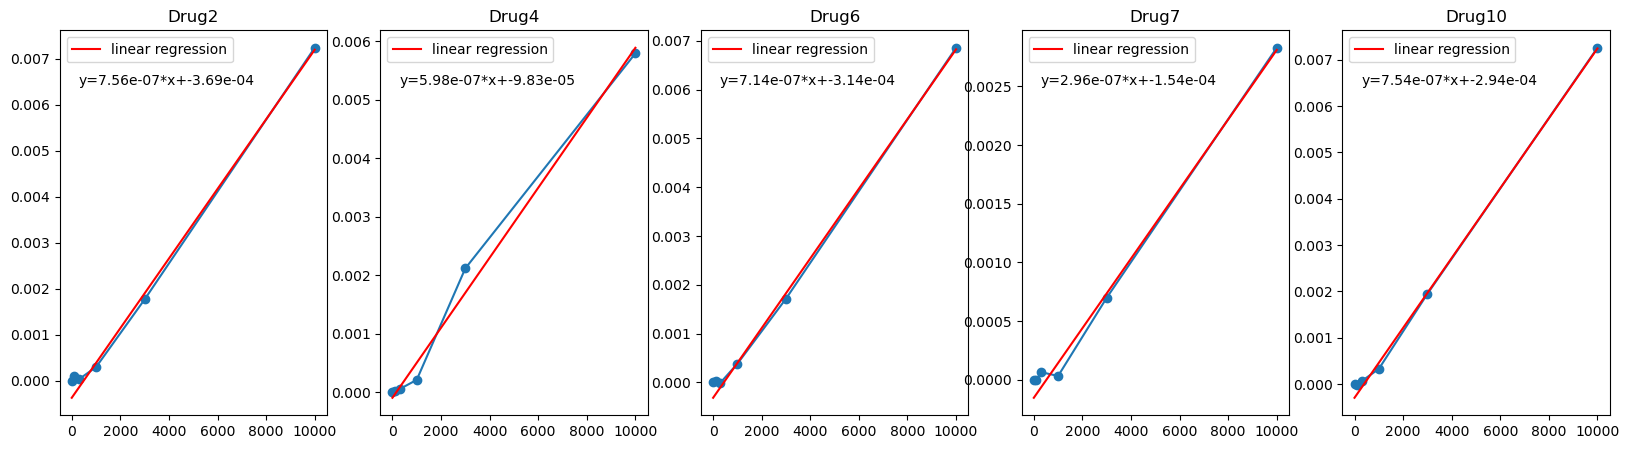

In [64]:
data_vitality = pd.read_excel('D:/CQB/会议/2024UQ-Bio/Assignments/UQbio2024_Team3/fig/vitality_drug.xlsx')
fig, ax = plt.subplots(1,5,figsize=(20,5))
for i in range(5):
    data_vitality.iloc[:,i+1] = data_vitality.iloc[:,i+1] - 0.000072
    ax[i].plot(data_vitality.iloc[:,0], data_vitality.iloc[:,i+1], 'o-')
    ax[i].set_title(data_vitality.columns[i+1])
    slope, intercept, _, _, _ = linregress(data_vitality.iloc[2:,0], data_vitality.iloc[2:,i+1])
    ax[i].plot(data_vitality.iloc[:,0], slope*data_vitality.iloc[:,0]+intercept, 'r-', label = 'linear regression')
    ax[i].legend()
    ax[i].text(0.4, 0.85, f'y={slope:.2e}*x+{intercept:.2e}', transform=ax[i].transAxes, ha='center', va='bottom')